# Trabalho Luana Ambrosio

In [1]:
# Instalando bibliotecas a serem utilizadas

%pip install statsmodels
%pip install yfinance
%pip install pandas
%pip install numpy
%pip install plotly
%pip install matplotlib
%pip install scipy
%pip install deap
%pip install datetime
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
%pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Etapa 1: Estratégia para coleta de Dados

Para coletar os dados, vamos retirá-los da biblioteca yfinance a partir de alguns ativos de caráter ESG selecionados para trabalhar com os dados dos ativos e realizar as análises necessárias.

## Etapa 2: Opções de Investimento privilegiando ESG

### Opções:

#### 1) Ações de Empresas Sustentáveis (AAPL - Apple Inc.):
- Justificação ESG: A Apple é reconhecida por suas práticas sustentáveis.

#### 2) Fundos de Investimento Socialmente Responsáveis (DSI - iShares MSCI KLD 400 Social ETF):
- Justificação ESG: Este ETF inclui empresas que demonstram sólido desempenho em critérios ESG.

#### 3) Fundos Imobiliários Sustentáveis (VNQ - Vanguard Real Estate ETF):
- Justificação ESG: Esse ETF inclui propriedades imobiliárias que adotam práticas sustentáveis.

#### 4) Criptomoedas com Foco em Sustentabilidade (ETH-USD - Ethereum):
- Justificação ESG: Ethereum está em transição para um modelo de consenso de Proof of Stake.

#### 5) Investimentos em Energias Renováveis (ZC=F - Contrato Futuro de Milho):
- Justificação ESG: Contratos futuros de commodities relacionadas a energias renováveis, como o milho, contribuem para o suporte a práticas agrícolas sustentáveis.


In [4]:
import yfinance as yf

# Lista de Tickers
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']

# Dicionário para armazenar os dados
dados = {}

# Obtendo dados para cada ticker
for ticker in tickers:
    dados[ticker] = yf.download(ticker, start='2022-01-01', end='2023-01-01')

# Visualizando informações sobre os dados
for ticker, df in dados.items():
    print(f"\n### Dados para {ticker}\n")
    print(df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

### Dados para AAPL

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669998   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943970   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537

## Etapa 3: Gráfico de Retorno e Risco de cada tipo de investimento

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import norm

# Lista de Tickers
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']

# Dicionário para armazenar os dados
dados = {}

# Obtendo dados para cada ticker
for ticker in tickers:
    dados[ticker] = yf.download(ticker, start='2022-01-01', end='2023-01-01')

# Análise de Retorno
for ticker, df in dados.items():
    df['Retorno Diário'] = df['Adj Close'].pct_change()

# Análise de Risco e Retorno
resultados = []
for ticker, df in dados.items():
    # Retorno médio diário e anualizado
    retorno_medio_diario = df['Retorno Diário'].mean()
    retorno_medio_anualizado = (1 + retorno_medio_diario)**252 - 1  # 252 dias úteis em um ano
    
    # Risco (volatilidade) diário e anualizado
    volatilidade_diaria = df['Retorno Diário'].std()
    volatilidade_anualizada = volatilidade_diaria * np.sqrt(252)
    
    # Índice de Sharpe
    indice_sharpe = retorno_medio_anualizado / volatilidade_anualizada
    
    # VaR (Value at Risk) a 95%
    var_95 = norm.ppf(0.05, retorno_medio_diario, volatilidade_diaria)
    
    resultados.append({
        'Ticker': ticker,
        'Retorno Médio Anualizado': retorno_medio_anualizado,
        'Volatilidade Anualizada': volatilidade_anualizada,
        'Índice de Sharpe': indice_sharpe,
        'VaR (95%)': var_95
    })

# Visualização de Dados com Plotly
for ticker, df in dados.items():
    # Gráfico de Linha com Plotly
    fig = px.line(df, x=df.index, y='Adj Close', labels={'Adj Close': 'Preço de Fechamento Ajustado'}, title=f'Desempenho Histórico de {ticker}')
    fig.show()

# Gráfico de Barras para Análise de Risco e Retorno com Plotly
df_resultados = pd.DataFrame(resultados)
fig_resultados = px.bar(df_resultados, x='Ticker', y=['Retorno Médio Anualizado', 'Volatilidade Anualizada'], 
                        title='Análise de Risco e Retorno', labels={'value': 'Valor'})
fig_resultados.show()

# Tabela com métricas
df_resultados[['Ticker', 'Índice de Sharpe', 'VaR (95%)']]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Ticker  Índice de Sharpe  VaR (95%)
0     AAPL         -0.664749  -0.038036
1      DSI         -0.778007  -0.027100
2      VNQ         -0.950730  -0.026725
3  ETH-USD         -0.575704  -0.076566
4     ZC=F          0.683059  -0.030908

No código acima, para cada ativo, é calculado os retornos diários percentuais com base nos preços de fechamento ajustados.
Para cada ativo, são calculados diversos indicadores de risco e retorno, incluindo o retorno médio diário e anualizado, a volatilidade diária e anualizada, o Índice de Sharpe e o VaR (Value at Risk) a 95%.

Índices Econômicos utilizadas na análise de risco/retorno dos ativos em questão:

- Retorno Médio Anualizado:

Representa a média ponderada dos retornos diários, anualizada para facilitar a comparação entre ativos e ao longo do tempo. É uma medida de desempenho médio.
- Volatilidade Anualizada:

Reflete a variação dos retornos ao longo do tempo. Quanto maior a volatilidade, maior é o risco associado ao ativo.
- Índice de Sharpe:

Mede a relação entre o retorno do ativo e seu risco. Quanto maior o Índice de Sharpe, melhor é o desempenho ajustado ao risco.
- VaR (Value at Risk) a 95%:

Indica a perda máxima esperada com 95% de confiança. É uma medida crucial para avaliação de risco, fornecendo uma estimativa da exposição a eventos extremos.

## Etapa 4: Sugestão de divisão de portfólio

### 4.1 Simulação de Montecarlo

In [6]:
import yfinance as yf
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def simulacao_monte_carlo(S, K, r, sigma, T, num_simulacoes, num_passos):
    """
    Simulação de Monte Carlo para avaliação de opções de compra e venda europeias.

    Parâmetros:
    - S: preço atual do ativo
    - K: preço de exercício da opção
    - r: taxa livre de risco
    - sigma: volatilidade do ativo
    - T: tempo até a data de vencimento da opção (em anos)
    - num_simulacoes: número de simulações a serem realizadas
    - num_passos: número de passos na simulação

    Retorna:
    - Valor estimado da opção de compra e venda
    """

    dt = T / num_passos
    opcao_compra_payoffs = []
    opcao_venda_payoffs = []

    for _ in range(num_simulacoes):
        precos = [S]

        for _ in range(num_passos):
            Z = np.random.normal(0, 1)
            retorno = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
            preco_novo = precos[-1] * np.exp(retorno)
            precos.append(preco_novo)

        opcao_compra_payoff = max(0, precos[-1] - K)
        opcao_venda_payoff = max(0, K - precos[-1])

        opcao_compra_payoffs.append(opcao_compra_payoff)
        opcao_venda_payoffs.append(opcao_venda_payoff)

    valor_opcao_compra = np.exp(-r * T) * np.mean(opcao_compra_payoffs)
    valor_opcao_venda = np.exp(-r * T) * np.mean(opcao_venda_payoffs)

    return valor_opcao_compra, valor_opcao_venda

def black_scholes(S, K, r, sigma, T, option_type='call'):
    """
    Modelo de Black-Scholes para calcular o preço de uma opção europeia.

    Parâmetros:
    - S: preço atual do ativo
    - K: preço de exercício da opção
    - r: taxa livre de risco
    - sigma: volatilidade do ativo
    - T: tempo até a data de vencimento da opção (em anos)
    - option_type: tipo de opção ('call' para opção de compra, 'put' para opção de venda)

    Retorna:
    - Valor da opção calculado pelo modelo de Black-Scholes
    """

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Opção não reconhecida. Use 'call' ou 'put'.")

    return option_price

# Função para obter dados do yfinance
def obter_dados_yfinance(ticker):
    return yf.download(ticker, start='2022-01-01', end='2023-01-01')['Adj Close']

# Parâmetros específicos dos ativos e da opção
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']

# Configurações da simulação de Monte Carlo
num_simulacoes = 1000
num_passos_simulacao = 252  # Número de dias de negociação em um ano

# Executar simulação de Monte Carlo e calcular os preços usando o modelo de Black-Scholes
for ticker in tickers:
    dados = obter_dados_yfinance(ticker)
    preco_atual = dados.iloc[-1]  # preço atual é o último preço disponível nos dados
    preco_exercicio = preco_atual * 1.1  # preço de exercício é definido como 110% do preço atual
    taxa_livre_risco = 0.05
    volatilidade = dados.pct_change().std() * np.sqrt(252)  # volatilidade anualizada
    tempo_ate_vencimento = 1  # substitua pelo tempo desejado até o vencimento

    # Executar simulação de Monte Carlo
    valor_opcao_compra, valor_opcao_venda = simulacao_monte_carlo(preco_atual, preco_exercicio,
                                                                  taxa_livre_risco, volatilidade,
                                                                  tempo_ate_vencimento,
                                                                  num_simulacoes, num_passos_simulacao)

    # Calcular os preços usando o modelo de Black-Scholes
    preco_opcao_compra_bs = black_scholes(preco_atual, preco_exercicio, taxa_livre_risco,
                                          volatilidade, tempo_ate_vencimento, option_type='call')
    preco_opcao_venda_bs = black_scholes(preco_atual, preco_exercicio, taxa_livre_risco,
                                         volatilidade, tempo_ate_vencimento, option_type='put')

    # Exibir resultados
    print(f"\nTicker: {ticker}")
    print(f"Preço Opção de Compra (Monte Carlo): {valor_opcao_compra:.2f}")
    print(f"Preço Opção de Venda (Monte Carlo): {valor_opcao_venda:.2f}")
    print(f"Preço Opção de Compra (Black-Scholes): {preco_opcao_compra_bs:.2f}")
    print(f"Preço Opção de Venda (Black-Scholes): {preco_opcao_venda_bs:.2f}")


[*********************100%%**********************]  1 of 1 completed

Ticker: AAPL
Preço Opção de Compra (Monte Carlo): 15.34
Preço Opção de Venda (Monte Carlo): 23.09
Preço Opção de Compra (Black-Scholes): 15.87
Preço Opção de Venda (Black-Scholes): 21.86
[*********************100%%**********************]  1 of 1 completed

Ticker: DSI
Preço Opção de Compra (Monte Carlo): 5.67
Preço Opção de Venda (Monte Carlo): 9.12
Preço Opção de Compra (Black-Scholes): 5.80
Preço Opção de Venda (Black-Scholes): 9.09
[*********************100%%**********************]  1 of 1 completed

Ticker: VNQ
Preço Opção de Compra (Monte Carlo): 6.07
Preço Opção de Venda (Monte Carlo): 10.49
Preço Opção de Compra (Black-Scholes): 6.34
Preço Opção de Venda (Black-Scholes): 10.05
[*********************100%%**********************]  1 of 1 completed

Ticker: ETH-USD
Preço Opção de Compra (Monte Carlo): 324.55
Preço Opção de Venda (Monte Carlo): 368.80
Preço Opção de Compra (Black-Scholes): 316.51
Preço Opção de Ven

A análise acima utiliza simulações de Monte Carlo e o modelo Black-Scholes. Falaremos um pouco sobre a utilidade dessa análise para a missão de identificar a alocação optimal do do montante de Ana dada os ativos em questão: 

- Simulação Monte Carlo: Gera uma variedade de resultados possíveis, permitindo a análise de diferentes trajetórias de preços e avaliação de riscos extremos. Isso é particularmente relevante para opções, dadas as características não-lineares de seus payoffs.

- Modelo de Black-Scholes: Fornece uma base teórica para entender como fatores individuais afetam os preços das opções. A volatilidade, por exemplo, desempenha um papel significativo na precificação, e a análise ajuda a quantificar esse impacto.

Consideramos também que essa análise contribui com os seguintes fatores para determinar o potfólio optimal: 

- Comparação de Precificação: Ao comparar os preços das opções derivados da simulação Monte Carlo e do modelo de Black-Scholes, Ana pode avaliar a robustez das estimativas. A divergência entre os métodos pode indicar áreas de incerteza.

- Otimização de Portfólio: Utilizando os preços calculados das opções, Ana pode incorporar essas estimativas em modelos de otimização de portfólio. A alocação ótima pode ser determinada considerando não apenas retornos e riscos dos ativos subjacentes, mas também o perfil de risco-retorno das opções associadas.

[*********************100%%**********************]  1 of 1 completed

Ticker: AAPL
Preço Opção de Compra (Black-Scholes): 15.87
Preço Opção de Venda (Black-Scholes): 21.86
Probabilidade de Queda Abaixo do Limiar: 70.70%


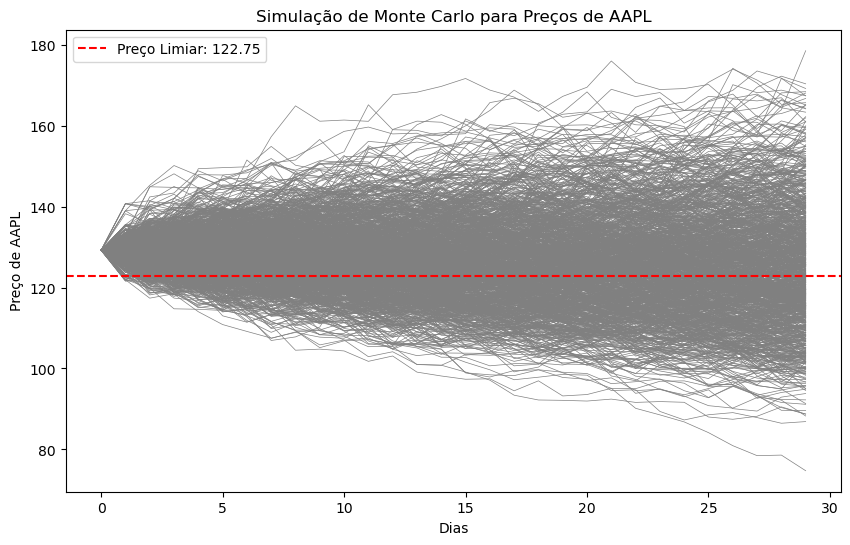

Recomendação: VENDER
[*********************100%%**********************]  1 of 1 completed

Ticker: DSI
Preço Opção de Compra (Black-Scholes): 5.80
Preço Opção de Venda (Black-Scholes): 9.09
Probabilidade de Queda Abaixo do Limiar: 60.00%


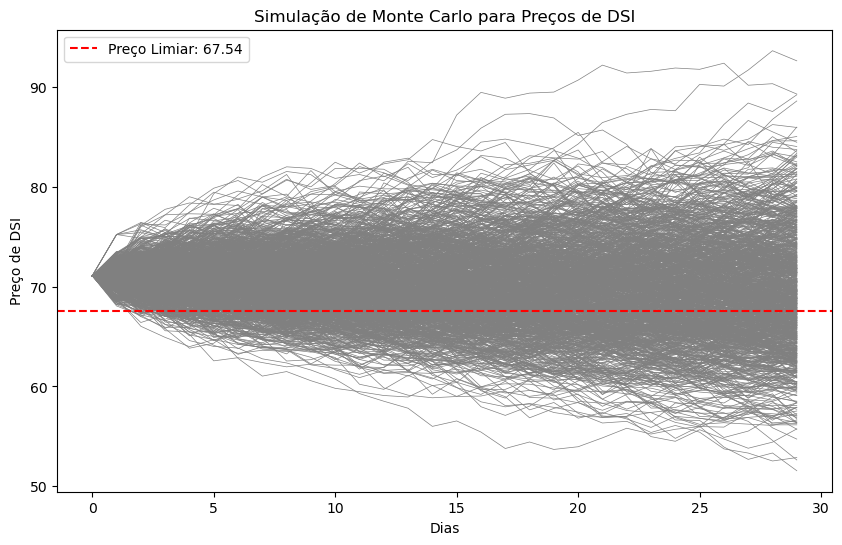

Recomendação: MANTER
[*********************100%%**********************]  1 of 1 completed

Ticker: VNQ
Preço Opção de Compra (Black-Scholes): 6.34
Preço Opção de Venda (Black-Scholes): 10.05
Probabilidade de Queda Abaixo do Limiar: 59.80%


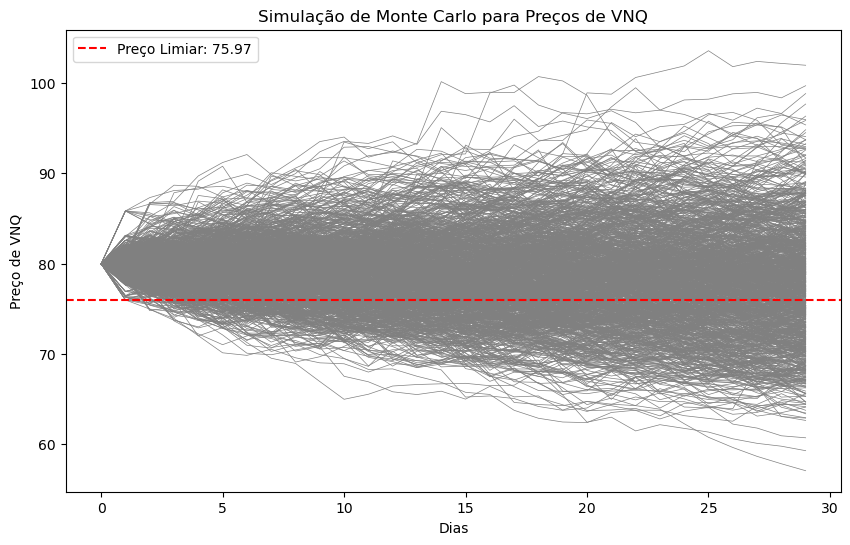

Recomendação: MANTER
[*********************100%%**********************]  1 of 1 completed

Ticker: ETH-USD
Preço Opção de Compra (Black-Scholes): 316.51
Preço Opção de Venda (Black-Scholes): 371.99
Probabilidade de Queda Abaixo do Limiar: 79.20%


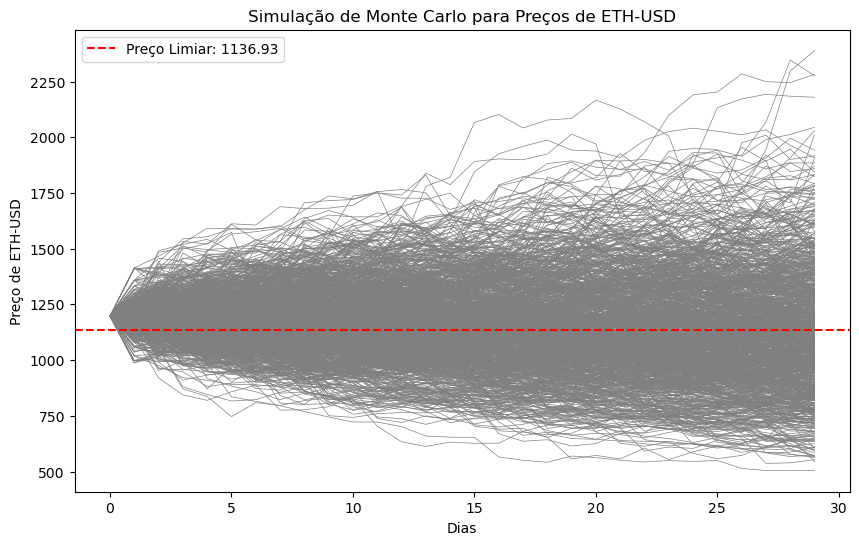

Recomendação: VENDER
[*********************100%%**********************]  1 of 1 completed

Ticker: ZC=F
Preço Opção de Compra (Black-Scholes): 69.49
Preço Opção de Venda (Black-Scholes): 100.94
Probabilidade de Queda Abaixo do Limiar: 45.50%


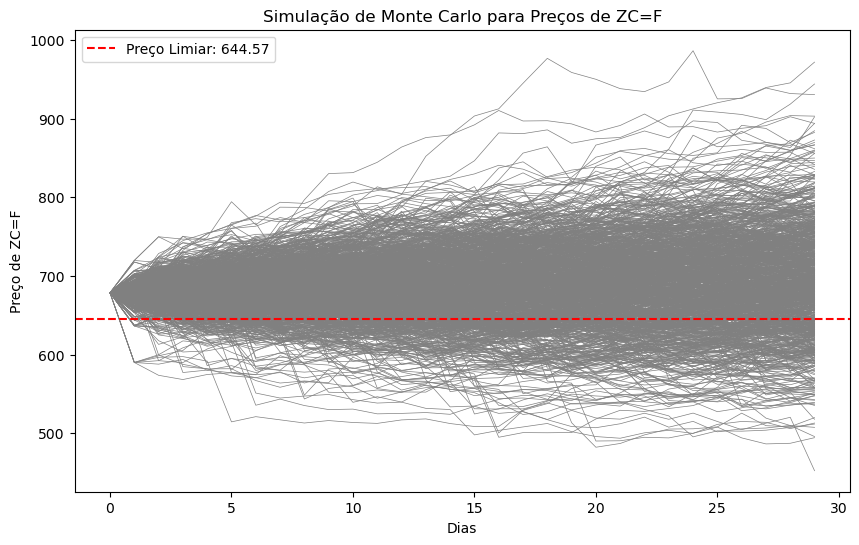

Recomendação: MANTER


In [7]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulacao_monte_carlo_para_ticker(ticker, dias, simulacoes, dados):
    retornos = dados.pct_change().dropna()

    precos_simulados = np.zeros((dias, simulacoes))
    precos_simulados[0] = dados[-1]  # Começa com o último preço disponível

    for s in range(simulacoes):
        for d in range(1, dias):
            precos_simulados[d, s] = precos_simulados[d-1, s] * (1 + np.random.choice(retornos))

    return precos_simulados

def calcular_probabilidade_queda_limiar(precos_simulados, preco_limiar):
    return (precos_simulados < preco_limiar).any(axis=0).mean()

def plotar_simulacao_monte_carlo(precos_simulados, preco_limiar, ticker, simulacoes):
    plt.figure(figsize=(10, 6))
    for s in range(simulacoes):
        plt.plot(precos_simulados[:, s], color='gray', linewidth=0.5)

    plt.axhline(y=preco_limiar, color='r', linestyle='--', label=f'Preço Limiar: {preco_limiar:.2f}')
    plt.title(f'Simulação de Monte Carlo para Preços de {ticker}')
    plt.xlabel('Dias')
    plt.ylabel(f'Preço de {ticker}')
    plt.legend()
    plt.show()

# Função para calcular opções usando o modelo de Black-Scholes
def calcular_opcoes_black_scholes(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    preco_opcao_compra_bs = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    preco_opcao_venda_bs = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return preco_opcao_compra_bs, preco_opcao_venda_bs

# Configurações gerais
dias_simulacao = 30
simulacoes_monte_carlo = 1000

# Parâmetros específicos dos ativos
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']

for ticker in tickers:
    dados_ticker = obter_dados_yfinance(ticker)
    preco_atual_ticker = dados_ticker.iloc[-1]
    preco_exercicio_ticker = preco_atual_ticker * 1.1  # preço de exercício é definido como 110% do preço atual

    # Executar simulação de Monte Carlo para o ticker
    precos_simulados_ticker = simulacao_monte_carlo_para_ticker(ticker, dias_simulacao,
                                                                simulacoes_monte_carlo, dados_ticker)

    # Calcular opções usando o modelo de Black-Scholes
    taxa_livre_risco_ticker = 0.05
    volatilidade_ticker = dados_ticker.pct_change().std() * np.sqrt(252)  # volatilidade anualizada
    tempo_ate_vencimento_ticker = 1  # substitua pelo tempo desejado até o vencimento

    preco_opcao_compra_bs_ticker, preco_opcao_venda_bs_ticker = calcular_opcoes_black_scholes(
        preco_atual_ticker, preco_exercicio_ticker, taxa_livre_risco_ticker,
        volatilidade_ticker, tempo_ate_vencimento_ticker)

    # Calcular a probabilidade de queda abaixo do preço limiar
    preco_limiar_ticker = preco_atual_ticker * 0.95
    prob_abaixo_limiar_ticker = calcular_probabilidade_queda_limiar(precos_simulados_ticker, preco_limiar_ticker)

    # Exibir resultados
    print(f"\nTicker: {ticker}")
    print(f"Preço Opção de Compra (Black-Scholes): {preco_opcao_compra_bs_ticker:.2f}")
    print(f"Preço Opção de Venda (Black-Scholes): {preco_opcao_venda_bs_ticker:.2f}")
    print(f"Probabilidade de Queda Abaixo do Limiar: {prob_abaixo_limiar_ticker:.2%}")

    # Trajetórias da simulação de Monte Carlo
    plotar_simulacao_monte_carlo(precos_simulados_ticker, preco_limiar_ticker, ticker, simulacoes_monte_carlo)

    # Recomendação com base na probabilidade
    if prob_abaixo_limiar_ticker > 0.7:
        print("Recomendação: VENDER")
    else:
        print("Recomendação: MANTER")


No código acima fazemos: 

1. Simulação de Monte Carlo:
Utilizamos simulação de Monte Carlo para gerar múltiplos cenários de preços futuros.
A variabilidade nos resultados ajuda a capturar a incerteza inerente nos movimentos de preços, fornecendo distribuições possíveis para análise.

2. Avaliação de Opções pelo Modelo de Black-Scholes:
Calculamos os preços de opções de compra e venda usando o modelo de Black-Scholes.
Fornecemos uma avaliação teórica dos preços das opções, incorporando fatores como volatilidade, taxa de juros e tempo até o vencimento.

3. Probabilidade de Queda Abaixo de um Limiar:
Avaliaamos a probabilidade de os preços simulados caírem abaixo de um limiar predefinido.
Ajuda a quantificar o risco associado a quedas de preço e oferece informações valiosas para estratégias de gestão de risco.

4. Visualização das Simulações de Monte Carlo:
Apresentamos visualmente as trajetórias simuladas, permitindo uma compreensão intuitiva das possíveis variações nos preços.
Facilitamos a identificação de padrões e comportamentos extremos.

5. Recomendação com Base na Probabilidade:
Utilizamos a probabilidade de queda abaixo do limiar como critério para recomendações.
Facilitamos a automatização de decisões, ajudando a determinar se deve ser mantido ou vendido com base na avaliação de risco.

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Define the tickers for ESG-focused ETFs
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']

# Function to fetch data using yfinance
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Fetch historical data for the tickers
historical_data = fetch_data(tickers, "2022-01-01", "2023-01-01")

# Calculate daily returns
daily_returns = historical_data.pct_change().dropna()

# Monte Carlo simulation parameters
num_portfolios = 5000
all_weights = np.zeros((num_portfolios, len(tickers)))
return_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

# Risk-free rate for Sharpe Ratio calculation
risk_free_rate = 0.02

# Monte Carlo Simulation
for i in range(num_portfolios):
    # Random weights
    weights = np.array(np.random.random(len(tickers)))
    weights /= np.sum(weights)
    
    # Save weights
    all_weights[i, :] = weights
    
    # Expected return
    return_array[i] = np.sum(daily_returns.mean() * weights * 252)
    
    # Expected volatility
    volatility_array[i] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    
    # Sharpe Ratio
    sharpe_array[i] = (return_array[i] - risk_free_rate) / volatility_array[i]

# Find the portfolio with the highest Sharpe Ratio
max_sharpe_idx = sharpe_array.argmax()
max_sharpe_return = return_array[max_sharpe_idx]
max_sharpe_volatility = volatility_array[max_sharpe_idx]

# Portfolio with the highest Sharpe Ratio (optimal portfolio)
optimal_weights = all_weights[max_sharpe_idx]

# Create a DataFrame for the optimal portfolio
optimal_portfolio_df = pd.DataFrame(optimal_weights, index=tickers, columns=['Allocation'])
optimal_portfolio_df['Allocation'] = optimal_portfolio_df['Allocation'].apply(lambda x: f"{x:.2%}")

# Print the optimal portfolio
print("Optimal Portfolio Allocation:")
print(optimal_portfolio_df)


[*********************100%%**********************]  5 of 5 completed
Optimal Portfolio Allocation:
        Allocation
AAPL         4.00%
DSI         30.08%
VNQ          0.01%
ETH-USD      0.59%
ZC=F        65.32%


No código acima, trazemos:
 - Os retornos diários calculados a partir dos dados ajustados para fechamento, estabelecendo a base para a análise de desempenho do portfólio.
 - A simulação de Monte Carlo realizada para gerar múltiplos portfólios com alocações de ativos aleatórias.
 - Cada carteira é avaliada em termos de retorno, volatilidade e Índice de Sharpe.
 
Por fim trazemos a recomendação optima de alocação: 
 - O resultado final é a alocação ótima de ativos que maximiza o Índice de Sharpe.
 - Cada ativo no portfólio é apresentado com a porcentagem de alocação.

In [9]:
investimento_inicial_total = 1000000
print(f'Alocação optima do valor inicial a ser investido por Ana:')
for index, row in optimal_portfolio_df.iterrows():
    key = index
    value = float(row['Allocation'][:-1]) / 100  # Convert percentage to a decimal
    allocated_value = value * investimento_inicial_total
    print(f'{key}: R${allocated_value:.2f}')


Alocação optima do valor inicial a ser investido por Ana:
AAPL: R$40000.00
DSI: R$300800.00
VNQ: R$100.00
ETH-USD: R$5900.00
ZC=F: R$653200.00


## Etapa 5: Projeção de Retorno para o próximo 1 ano

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Definir os tickers e os pesos
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']
weights = optimal_weights

# Baixar dados históricos
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close'].dropna()

# Calcular os retornos logarítmicos
log_returns = np.log(data / data.shift(1))

# Criar dataset de entradas (X) e saídas (y)
window_size = 252  # Aproximadamente 1 ano de dados de mercado
X = []
y = []

for i in range(window_size, len(log_returns)):
    X.append(log_returns.iloc[i-window_size:i].values.flatten())  # Retornos passados como características
    # Retorno acumulado do portfólio no próximo ano
    y.append(np.sum(log_returns.iloc[i:i+window_size].values @ weights))

X = np.array(X)
y = np.array(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar o modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Prever o retorno após 1 ano com a distribuição de portfólio atual
# Para isso, vamos usar o último ano de dados para prever o retorno do próximo ano
last_year_data = log_returns.iloc[-window_size:].values.flatten()
last_year_data_scaled = scaler.transform([last_year_data])

predicted_return = model.predict(last_year_data_scaled)

print(f"Previsão de retorno do portfólio após 1 ano: {predicted_return[0][0] * 100:.2f}%")



[*********************100%%**********************]  5 of 5 completed



1/1 [==============================] - 1s 673ms/step
Previsão de retorno do portfólio após 1 ano: 12.70%


Usamos nesse modelo os retornos logarítmicos são calculados com base nos preços de fechamento ajustados. Esses retornos são usados como entrada para o modelo de aprendizado de máquina. Em seguida utilizamos um conjunto de dados é criado com base nos retornos passados, onde as características (X) são os retornos dos ativos nos últimos 252 dias, e o rótulo (y) é o retorno acumulado do portfólio nos próximos 252 dias. Criamos um modelos de rede que possui três camadas: uma camada de entrada com 64 neurônios e função de ativação ReLU, uma camada intermediária com 32 neurônios e ReLU, e uma camada de saída com 1 neurônio e ativação linear. Por fim treinamos o modelo para fazer a previsão de 1 ano de rendimento do portfólio.

In [11]:
print(f"Retorno esperado por Ana após 1 ano com a alocação recomendada: R${investimento_inicial_total*predicted_return[0][0]:.2f}")

Retorno esperado por Ana após 1 ano com a alocação recomendada: R$127023.22


[*********************100%%**********************]  1 of 1 completed
Epoch 1/25
38/38 [==============================] - 14s 90ms/step - loss: 0.0235
Epoch 2/25
38/38 [==============================] - 3s 87ms/step - loss: 0.0036
Epoch 3/25
38/38 [==============================] - 3s 86ms/step - loss: 0.0030
Epoch 4/25
38/38 [==============================] - 3s 91ms/step - loss: 0.0027
Epoch 5/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0024
Epoch 6/25
38/38 [==============================] - 3s 87ms/step - loss: 0.0026
Epoch 7/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0021
Epoch 8/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0024
Epoch 9/25
38/38 [==============================] - 3s 85ms/step - loss: 0.0020
Epoch 10/25
38/38 [==============================] - 3s 86ms/step - loss: 0.0020
Epoch 11/25
38/38 [==============================] - 4s 93ms/step - loss: 0.0022
Epoch 12/25
38/38 [=============================

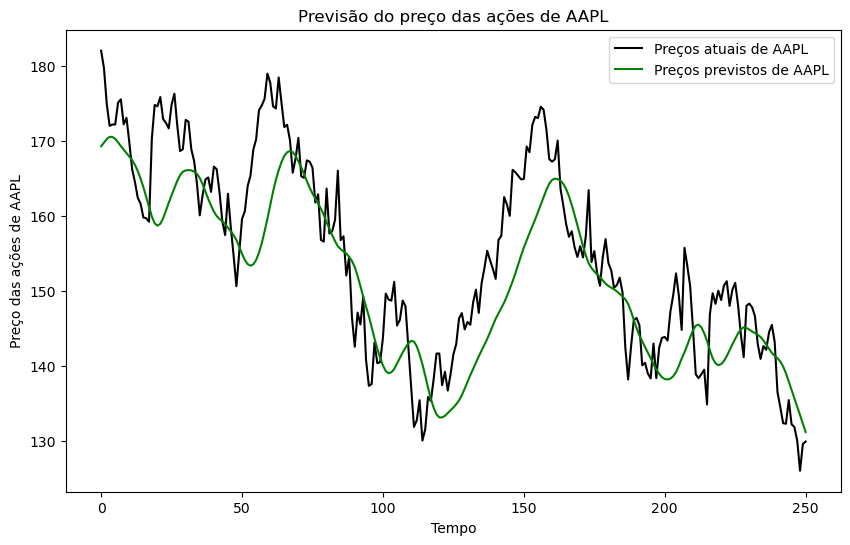

1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 77ms/step


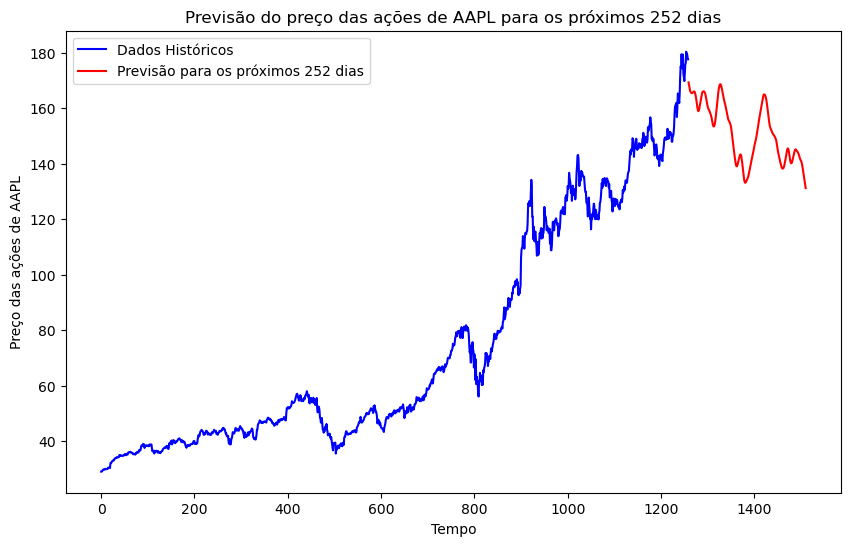

[*********************100%%**********************]  1 of 1 completed
Epoch 1/25
38/38 [==============================] - 13s 84ms/step - loss: 0.0236
Epoch 2/25
38/38 [==============================] - 3s 84ms/step - loss: 0.0036
Epoch 3/25
38/38 [==============================] - 3s 75ms/step - loss: 0.0032
Epoch 4/25
38/38 [==============================] - 3s 76ms/step - loss: 0.0027
Epoch 5/25
38/38 [==============================] - 3s 75ms/step - loss: 0.0031
Epoch 6/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0028
Epoch 7/25
38/38 [==============================] - 3s 75ms/step - loss: 0.0025
Epoch 8/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0027
Epoch 9/25
38/38 [==============================] - 3s 73ms/step - loss: 0.0027
Epoch 10/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0025
Epoch 11/25
38/38 [==============================] - 3s 73ms/step - loss: 0.0021
Epoch 12/25
38/38 [=============================

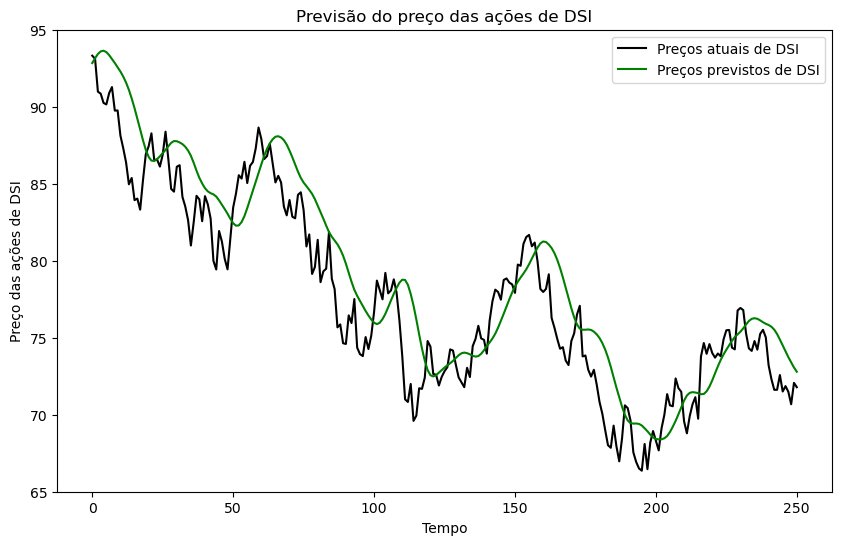

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 49ms/step


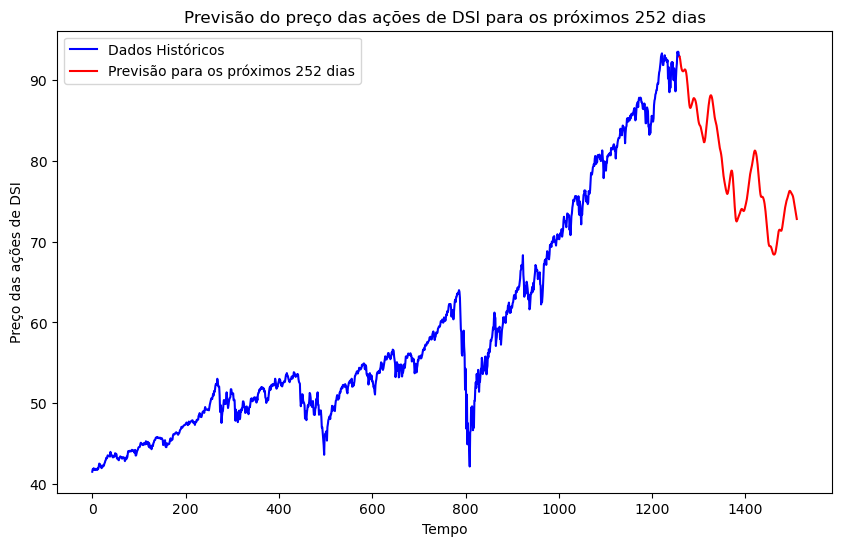

[*********************100%%**********************]  1 of 1 completed
Epoch 1/25
38/38 [==============================] - 12s 76ms/step - loss: 0.0352
Epoch 2/25
38/38 [==============================] - 3s 75ms/step - loss: 0.0072
Epoch 3/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0059
Epoch 4/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0057
Epoch 5/25
38/38 [==============================] - 3s 72ms/step - loss: 0.0054
Epoch 6/25
38/38 [==============================] - 3s 70ms/step - loss: 0.0052
Epoch 7/25
38/38 [==============================] - 3s 70ms/step - loss: 0.0053
Epoch 8/25
38/38 [==============================] - 3s 70ms/step - loss: 0.0048
Epoch 9/25
38/38 [==============================] - 3s 72ms/step - loss: 0.0041
Epoch 10/25
38/38 [==============================] - 3s 69ms/step - loss: 0.0048
Epoch 11/25
38/38 [==============================] - 3s 69ms/step - loss: 0.0041
Epoch 12/25
38/38 [=============================

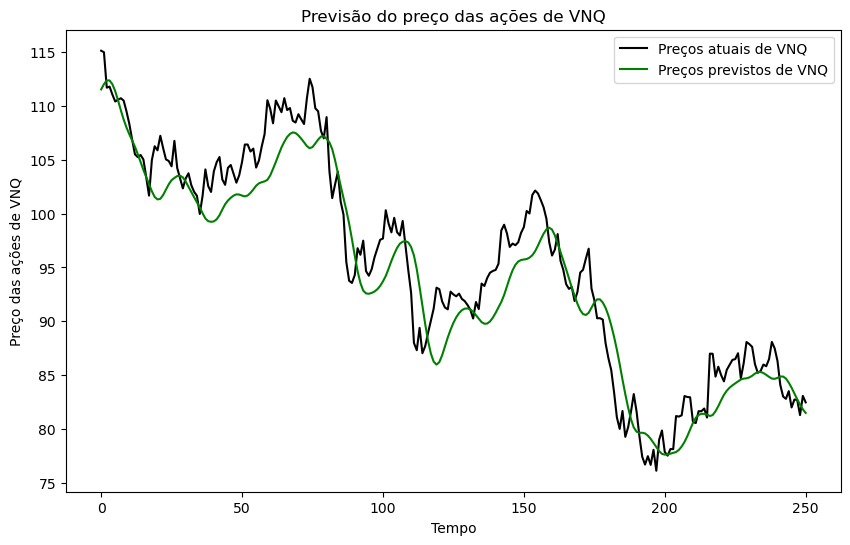

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 46ms/step


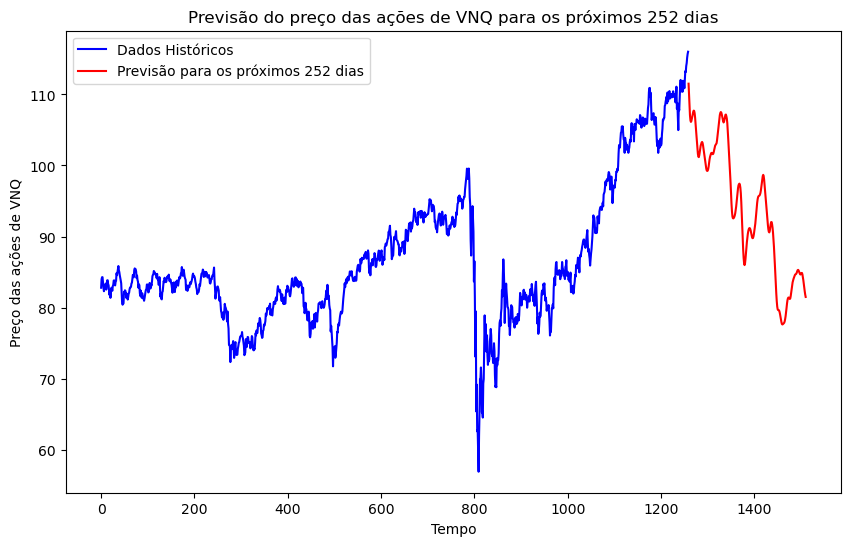

[*********************100%%**********************]  1 of 1 completed
Epoch 1/25
46/46 [==============================] - 12s 76ms/step - loss: 0.0125
Epoch 2/25
46/46 [==============================] - 4s 76ms/step - loss: 0.0035
Epoch 3/25
46/46 [==============================] - 3s 75ms/step - loss: 0.0029
Epoch 4/25
46/46 [==============================] - 4s 77ms/step - loss: 0.0027
Epoch 5/25
46/46 [==============================] - 3s 76ms/step - loss: 0.0029
Epoch 6/25
46/46 [==============================] - 3s 75ms/step - loss: 0.0023
Epoch 7/25
46/46 [==============================] - 3s 72ms/step - loss: 0.0025
Epoch 8/25
46/46 [==============================] - 3s 71ms/step - loss: 0.0025
Epoch 9/25
46/46 [==============================] - 3s 70ms/step - loss: 0.0023
Epoch 10/25
46/46 [==============================] - 4s 79ms/step - loss: 0.0022
Epoch 11/25
46/46 [==============================] - 3s 72ms/step - loss: 0.0021
Epoch 12/25
46/46 [=============================

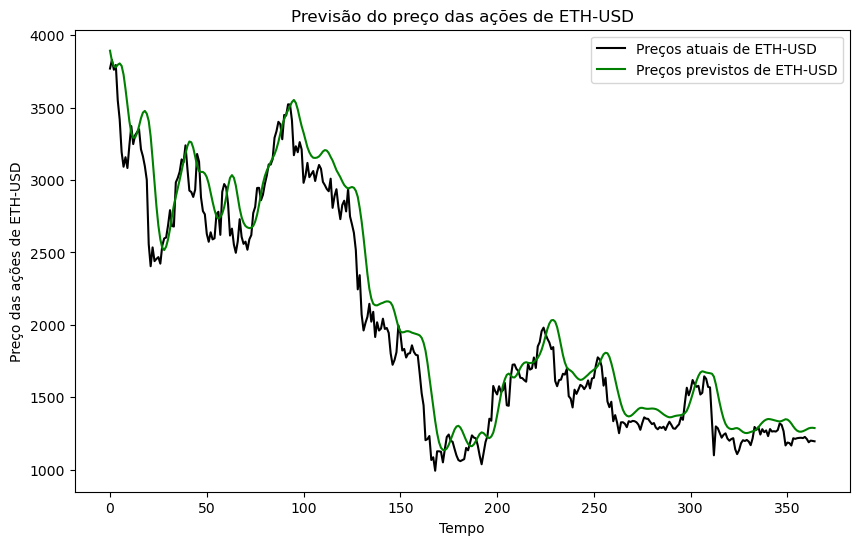

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 66ms/step


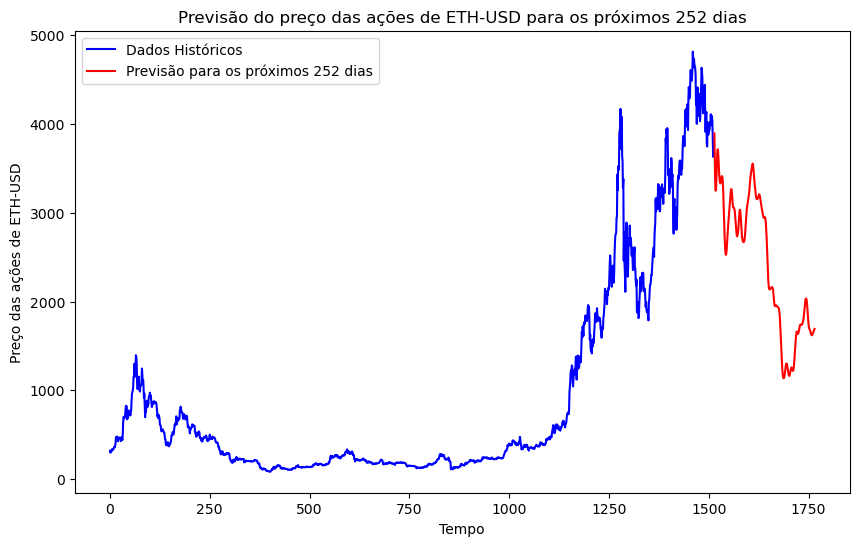

[*********************100%%**********************]  1 of 1 completed
Epoch 1/25
38/38 [==============================] - 15s 91ms/step - loss: 0.0158
Epoch 2/25
38/38 [==============================] - 4s 106ms/step - loss: 0.0045
Epoch 3/25
38/38 [==============================] - 3s 89ms/step - loss: 0.0032
Epoch 4/25
38/38 [==============================] - 5s 135ms/step - loss: 0.0030
Epoch 5/25
38/38 [==============================] - 5s 133ms/step - loss: 0.0030
Epoch 6/25
38/38 [==============================] - 4s 93ms/step - loss: 0.0024
Epoch 7/25
38/38 [==============================] - 3s 89ms/step - loss: 0.0024
Epoch 8/25
38/38 [==============================] - 3s 91ms/step - loss: 0.0023
Epoch 9/25
38/38 [==============================] - 3s 91ms/step - loss: 0.0026
Epoch 10/25
38/38 [==============================] - 4s 93ms/step - loss: 0.0023
Epoch 11/25
38/38 [==============================] - 4s 95ms/step - loss: 0.0019
Epoch 12/25
38/38 [==========================

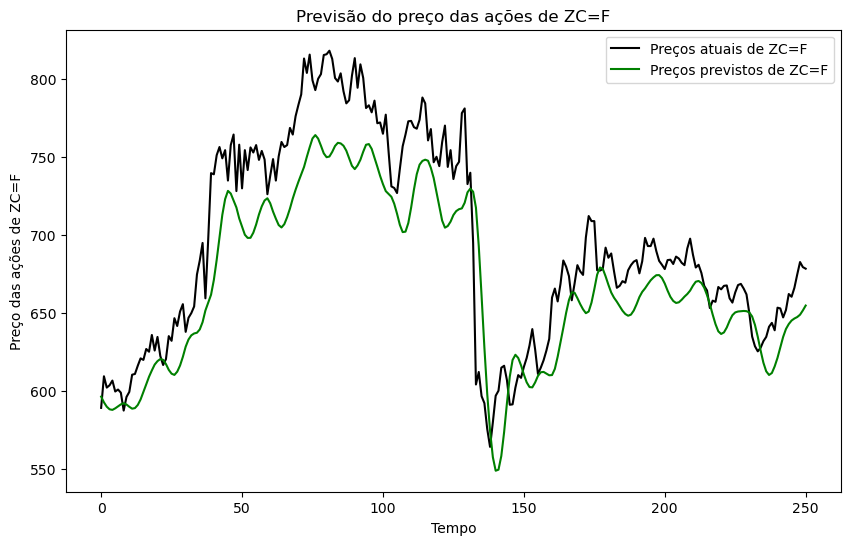

1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 56ms/step


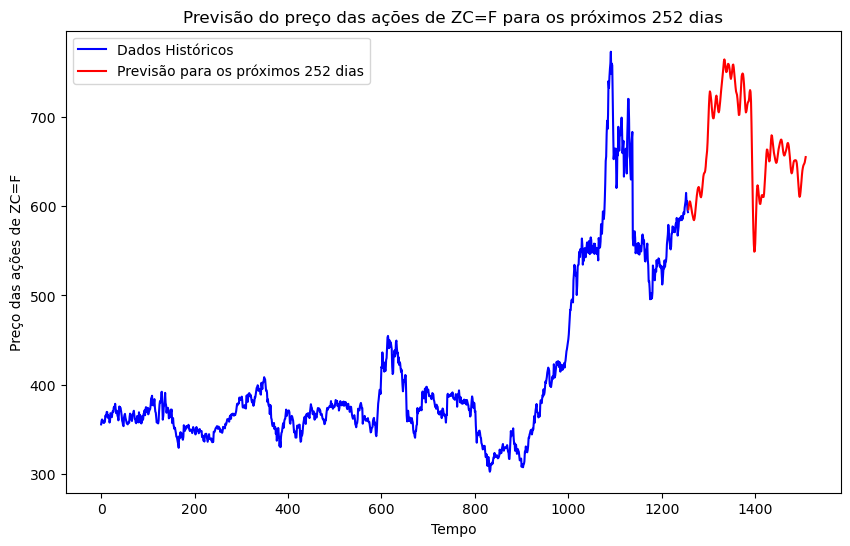

In [12]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# dados do ativo

tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']
for ativo in tickers:
    dados = yf.download(ativo, start="2017-01-01", end="2022-01-01")

    # preparar dados
    escalonador = MinMaxScaler(feature_range=(0,1))
    dados_escalados = escalonador.fit_transform(dados['Close'].values.reshape(-1,1))

    dias_de_previsao = 60

    x_treino = []
    y_treino = []

    for x in range(dias_de_previsao, len(dados_escalados)):
        x_treino.append(dados_escalados[x-dias_de_previsao:x, 0])
        y_treino.append(dados_escalados[x, 0])

    x_treino, y_treino = np.array(x_treino), np.array(y_treino)
    x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1))

    # REDE NEURAL
    modelo = Sequential()

    modelo.add(LSTM(units=50, return_sequences=True, input_shape=(x_treino.shape[1], 1)))
    modelo.add(Dropout(0.2))
    modelo.add(LSTM(units=50, return_sequences=True))
    modelo.add(Dropout(0.2))
    modelo.add(LSTM(units=50))
    modelo.add(Dropout(0.2))
    modelo.add(Dense(units=1))

    modelo.compile(optimizer='adam', loss='mean_squared_error')
    modelo.fit(x_treino, y_treino, epochs=25, batch_size=32)

    # carregar dados de teste
    dados_teste = yf.download(ativo, start="2022-01-01", end="2023-01-01")
    precos_reais = dados_teste['Close'].values

    conjunto_total = pd.concat((dados['Close'], dados_teste['Close']), axis=0)

    entradas_modelo = conjunto_total[len(conjunto_total) - len(dados_teste) - dias_de_previsao:].values
    entradas_modelo = entradas_modelo.reshape(-1, 1)
    entradas_modelo = escalonador.transform(entradas_modelo)

    # previsões nos dados de teste
    x_teste = []

    for x in range(dias_de_previsao, len(entradas_modelo)):
        x_teste.append(entradas_modelo[x-dias_de_previsao:x, 0]) # anexar os dados no modelo

    x_teste = np.array(x_teste)
    x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

    precos_previstos = modelo.predict(x_teste)
    precos_previstos = escalonador.inverse_transform(precos_previstos)

    # resultados do teste
    plt.figure(figsize=(10,6))
    plt.plot(precos_reais, color="black", label=f"Preços atuais de {ativo}")
    plt.plot(precos_previstos, color="green", label=f"Preços previstos de {ativo}")
    plt.title(f"Previsão do preço das ações de {ativo}")
    plt.xlabel('Tempo')
    plt.ylabel(f'Preço das ações de {ativo}')
    plt.legend()
    plt.show()

    previsoes_futuras = []
    ultimos_dias = dados_escalados[-dias_de_previsao:, 0]  # garantir que estamos pegando uma matriz unidimensional

    for i in range(252):  # prever os próximos 252 dias úteis
        x = ultimos_dias.reshape((1, dias_de_previsao, 1))
        preco_futuro = modelo.predict(x)
        previsoes_futuras.append(escalonador.inverse_transform(preco_futuro)[0][0])
        
        # atualizar 'ultimos_dias' com o novo valor previsto, mantendo o número correto de elementos
        novo_valor = np.array([precos_reais[-1+i] if i < len(precos_reais) else previsoes_futuras[-1]])
        novo_valor = novo_valor.reshape(-1, 1)
        novo_valor_escalado = escalonador.transform(novo_valor)
        ultimos_dias = np.append(ultimos_dias[1:], novo_valor_escalado)  #  o primeiro valor [0:] antes de anexar o novo


    #  resultados da previsão futura
    plt.figure(figsize=(10,6))
    plt.plot(range(len(dados['Close'])), dados['Close'], color="blue", label="Dados Históricos")
    plt.plot(range(len(dados['Close']), len(dados['Close']) + 252), previsoes_futuras, color="red", label="Previsão para os próximos 252 dias")
    plt.title(f"Previsão do preço das ações de {ativo} para os próximos 252 dias")
    plt.xlabel('Tempo')
    plt.ylabel(f'Preço das ações de {ativo}')
    plt.legend()
    plt.show()



No código acima, trazemos também, utilizando redes neurais a projeção de cada um dos ativos presente no nosso conjunto de ticker inicialmente proposto, isso nos ajuda a visualizar essa previsão do nosso portfólio sugerido, tão quanto entender, em questão de proporção a divisão recomendada entre os ativos em questão. 

## Etapa 6: Estratégia de monitoramento e rebalanceamento

Podemos olhar para faixas de Tolerância: Estabeleceremos faixas de tolerância para cada classe de ativos em seu portfólio. Uma faixa comum é de 5%, o que significa que se uma classe de ativos desvia mais de 5% de seu peso alvo, você deve considerar o rebalanceamento.

Podemos olhar também para pesos alvo: buscados para a otimização do portfólio utilizanod métodos mostrados anteriormente nesse trabalho. 

In [13]:
import yfinance as yf
import pandas as pd

# Defina os tickers e os pesos alvo do portfólio
tickers = ['AAPL', 'DSI', 'VNQ', 'ETH-USD', 'ZC=F']


target_weights = dict(zip(tickers,optimal_weights))

# Defina o intervalo de datas para o monitoramento
start_date = "2023-01-01"
end_date = "2023-11-01" # altere para: "pd.to_datetime('today').strftime('%Y-%m-%d')"

# Baixe os dados atuais do portfólio
current_prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].iloc[-1]

# Suponha que temos a seguinte quantidade de ações para cada ticker no portfólio
# Substitua isso pelos valores reais do seu portfólio no momento da análise
shares_held = {'AAPL': 50, 'DSI': 50, 'VNQ': 50, 'ETH-USD': 50, 'ZC=F': 50}

# Calcule o valor atual do portfólio
portfolio_value = sum(current_prices[ticker] * shares_held[ticker] for ticker in tickers)

# Calcule os pesos atuais
current_weights = {ticker: (current_prices[ticker] * shares_held[ticker]) / portfolio_value for ticker in tickers}

# Verifique se o rebalanceamento é necessário
rebalance_required = False
tolerance = 0.00  # Faixa de tolerância de 5%

for ticker in tickers:
    if abs(current_weights[ticker] - target_weights[ticker]) > tolerance:
        rebalance_required = True
        print(f"Rebalanceamento necessário para {ticker}. Peso atual: {current_weights[ticker]:.2f}, Peso alvo: {target_weights[ticker]:.2f}")

if not rebalance_required:
    print("Não é necessário rebalanceamento no momento.")


[*********************100%%**********************]  5 of 5 completed
Rebalanceamento necessário para AAPL. Peso atual: 0.07, Peso alvo: 0.04
Rebalanceamento necessário para DSI. Peso atual: 0.03, Peso alvo: 0.30
Rebalanceamento necessário para VNQ. Peso atual: 0.03, Peso alvo: 0.00
Rebalanceamento necessário para ETH-USD. Peso atual: 0.69, Peso alvo: 0.01
Rebalanceamento necessário para ZC=F. Peso atual: 0.18, Peso alvo: 0.65
